In [1]:
import pandas as pd
fbref = pd.read_csv('fbref_outfield_player_stats_Big-5-European-Leagues_2020-2021_last_updated_01092021.csv')
df1 = fbref[fbref['Pos'].apply(lambda x:x in ['FW','MF,FW','FW,MF'])]
all_player = df1.sort_values(by=['Min'],ascending = False,na_position='first')
# Display all rows where Min >= 1500 #500 players
minute = '1500'
age='26'
fw_filter1 = all_player[all_player['Age'].astype('int64')<=int(age)] #กรองแค่ Age Position
#Display all rows where Age <=26
fw_filter2 = fw_filter1[fw_filter1['Min'].astype('int64') >=int(minute)] #กรอง Min Age Position

#จำนวนข้อมูลที่ซ้ำ
print(len(fw_filter2[fw_filter2.duplicated(['Player'], keep = False)])) 
# Remove the duplicates
fw_filter2.drop_duplicates(['Player'], inplace=True)
# Reset dataframe index after drop_duplicates.
fw_filter2.reset_index(drop=True, inplace=True)
#print(fw_filter2)

fw_filter3 = fw_filter2.dropna()
#ข้อมูลซ้ำ
fw_filter3.duplicated('Player', keep = False) 
#จำนวนข้อมูลที่ซ้ำ
print(len(fw_filter3[fw_filter3.duplicated(['Player'], keep = False)])) 
# Remove the duplicates
fw_filter3.drop_duplicates(['Player'], inplace=True)
# Reset dataframe index after drop_duplicates.
fw_filter3.reset_index(drop=True, inplace=True)
#print(fw_filter3)



'''
by_Comp = fw_filter3.groupby('Comp')['Player'].count()
print(by_Comp)
'''
#แยกเป็นตัวแปรง่ายกว่า
FR = fw_filter2.loc[fw_filter2["Comp"] == "fr Ligue 1"]
FR.drop(columns=["Compl","Mn/Start","SoT%","Sh/90","SoT/90",'G/Sh',"G/SoT","Dist","npxG/Sh","Cmp%.3","Tkl%","Won%"],inplace=True)
FR.dropna(inplace=True)
FR.drop_duplicates(inplace=True)
fr = FR[FR['Min'].astype('int64') >=int(minute)] #กรอง Min Age Position
#print(fr.to_string())
print(len(fr[fr.duplicated(['Player'], keep = False)])) 
#FR.dropna(inplace=True)


bundes = fw_filter3.loc[fw_filter3["Comp"] == "de Bundesliga"]
laliga = fw_filter3.loc[fw_filter3["Comp"] == "es La Liga"]
PL = fw_filter2.loc[fw_filter2["Comp"] == "eng Premier League"]
PL.drop(columns=["Compl","Mn/Start","SoT%","Sh/90","SoT/90",'G/Sh',"G/SoT","Dist","npxG/Sh","Cmp%.3","Tkl%","Won%"],inplace=True)
PL.dropna(inplace=True)
PL.drop_duplicates(inplace=True)
pl = PL[PL['Min'].astype('int64') >=int(minute)] #กรอง Min Age Position
##print(pl.to_string())
#drop ค่า outlier
#index = [ 29  ,36 , 80 ,100 ,105 ,142, 176 ,178 ,186 ,402 ,433]
#pl.drop(index=index,inplace=True)
#print(pl)

calcio = fw_filter3.loc[fw_filter3["Comp"] == "it Serie A"]
'''
print("------------------Bundesliga GER-----------------")
print(bundes.head(2))
print("--------------------Laliga ESP------------------")
print(laliga.head(2))
print("----------------------EPL-----------------------")
print(pl.head(2))
print("-----------------Calcio Serie A------------------")
print(calcio.head(2))

'''


0
0
0


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


'\nprint("------------------Bundesliga GER-----------------")\nprint(bundes.head(2))\nprint("--------------------Laliga ESP------------------")\nprint(laliga.head(2))\nprint("----------------------EPL-----------------------")\nprint(pl.head(2))\nprint("-----------------Calcio Serie A------------------")\nprint(calcio.head(2))\n\n'

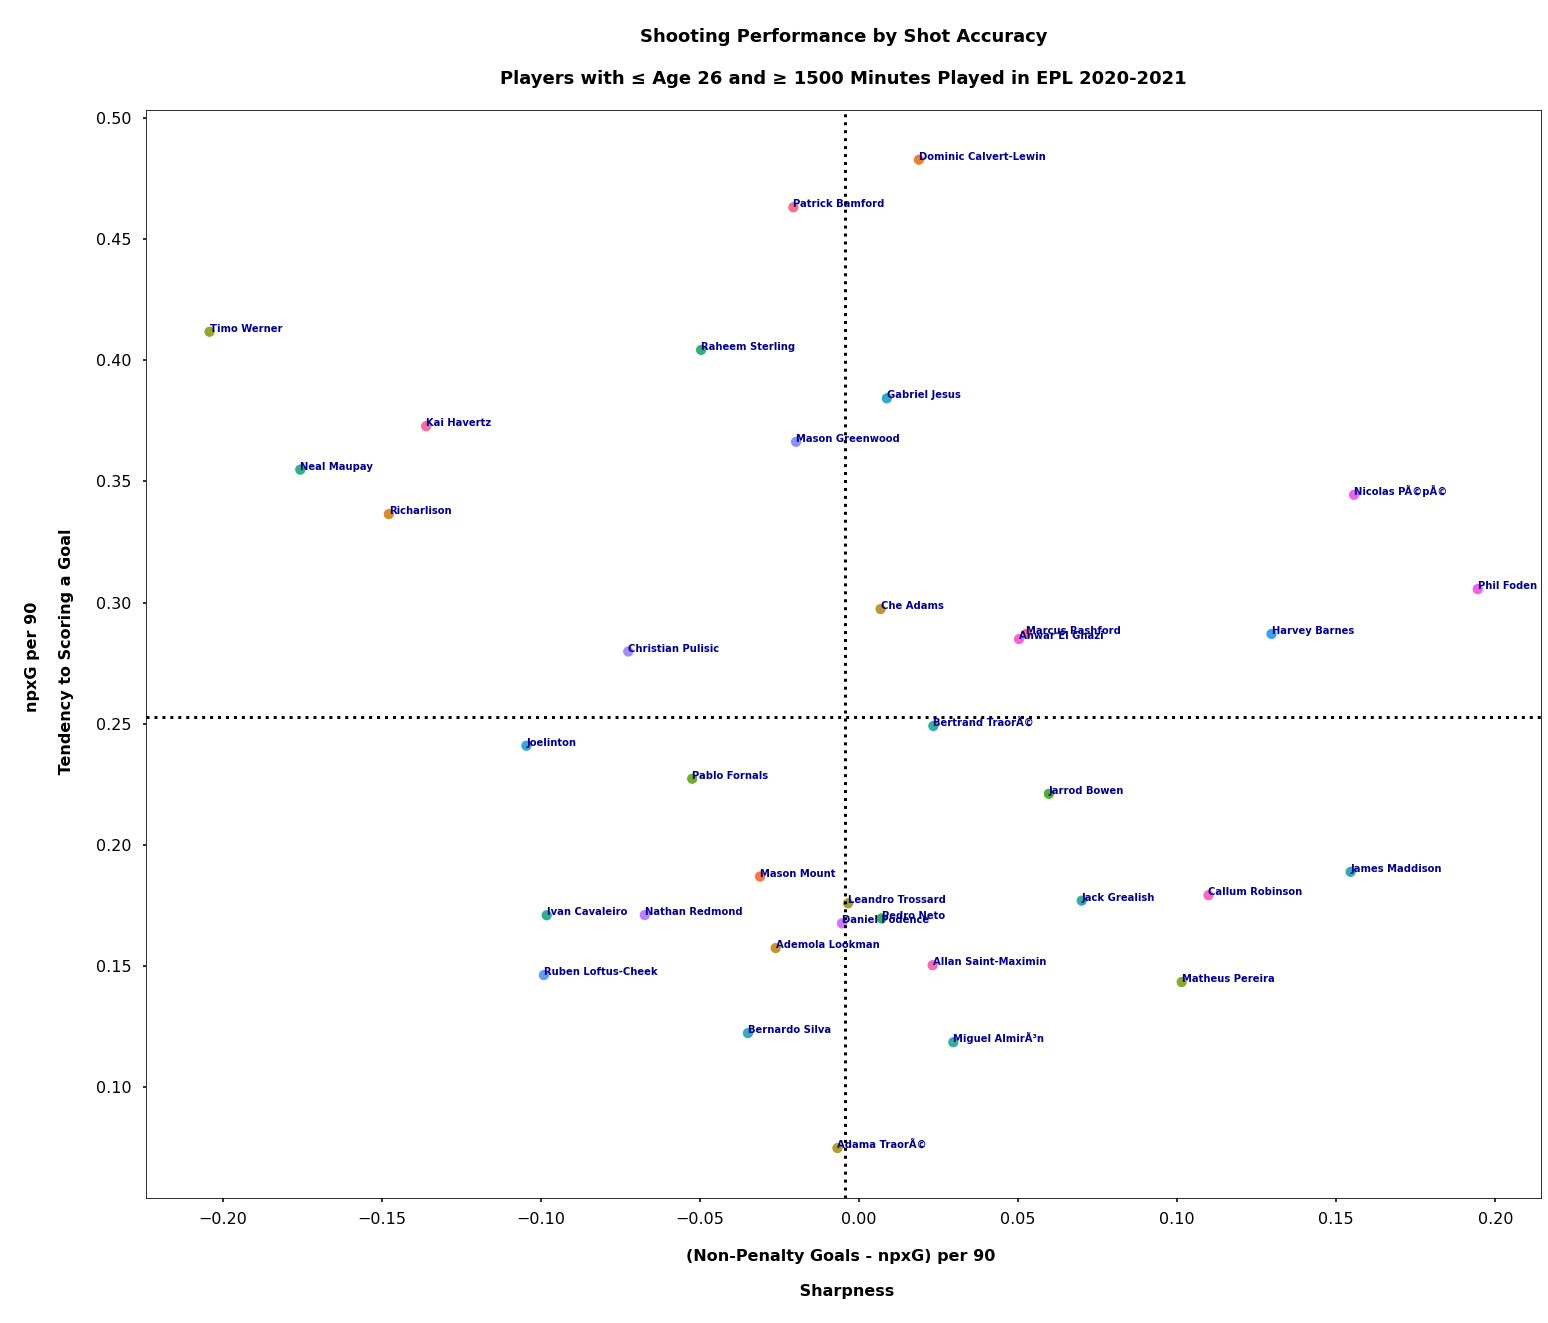

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
#shooting scatter plot : seaborn is my thing
import seaborn as sns 
#print(plt.style.available[:100])
from adjustText import adjust_text
line_color = "silver"
marker_color = "midnightblue"
from adjustText import adjust_text
with plt.style.context("seaborn-poster"):
    ax_scatter = plt.subplots(figsize= (25,20))
    plt.rcParams['font.family'] = 'Palatino Linotype' 
    # SETTING UP THE X AND Y OF THE SCATTERPLOT
    # axis-X : non-penalty goals minus npxG per 90 mins;(+) = ยิงคม
    # axis-Y : npxG per 90 mins ;(+) = ได้โอกาสยิงจ่อๆเยอะ
    x,y = (pl['np:G-xG'].astype('float64')/pl['90s'].astype('float64')).to_list(),((pl['npxG'].astype('float64')/pl['90s'].astype('float64')).astype('float64')).to_list()
    #plt.scatter(x,y,alpha=1,c='#EF8804')
    #scatter_label = [plt.text(x[i],y[i], f'Point{i}')for i in range(len(x))]
    labels = pl.Player
    sns.scatterplot(x=x,y=y,hue=labels,legend=False)
    sns.set(rc={'figure.figsize':(10,10)})
    scatter_label = [plt.text(x_pos,y_pos,f'{l}',fontsize=10,fontweight='bold',color='darkblue') for (x_pos,y_pos,l)in zip(x,y,labels)];
    plt.xlabel("\n(Non-Penalty Goals - npxG) per 90 \n\n Sharpness\n",fontsize = 16, fontweight='bold')
    plt.ylabel("\nnpxG per 90 \n\n Tendency to Scoring a Goal\n",fontsize = 16, fontweight='bold')
    plt.title("\nShooting Performance by Shot Accuracy\n\nPlayers with ≤ Age 26 and ≥ 1500 Minutes Played in EPL 2020-2021\n",fontsize = 18, fontweight='bold')
    plt.axvline((pl['np:G-xG'].astype('float64')/pl['90s'].astype('float64')).mean(),color = "black",linestyle ='dotted',linewidth = 3)
    plt.axhline((pl['npxG'].astype('float64')/pl['90s'].astype('float64')).mean(),color = "black",linestyle ='dotted',linewidth = 3)
plt.show()


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


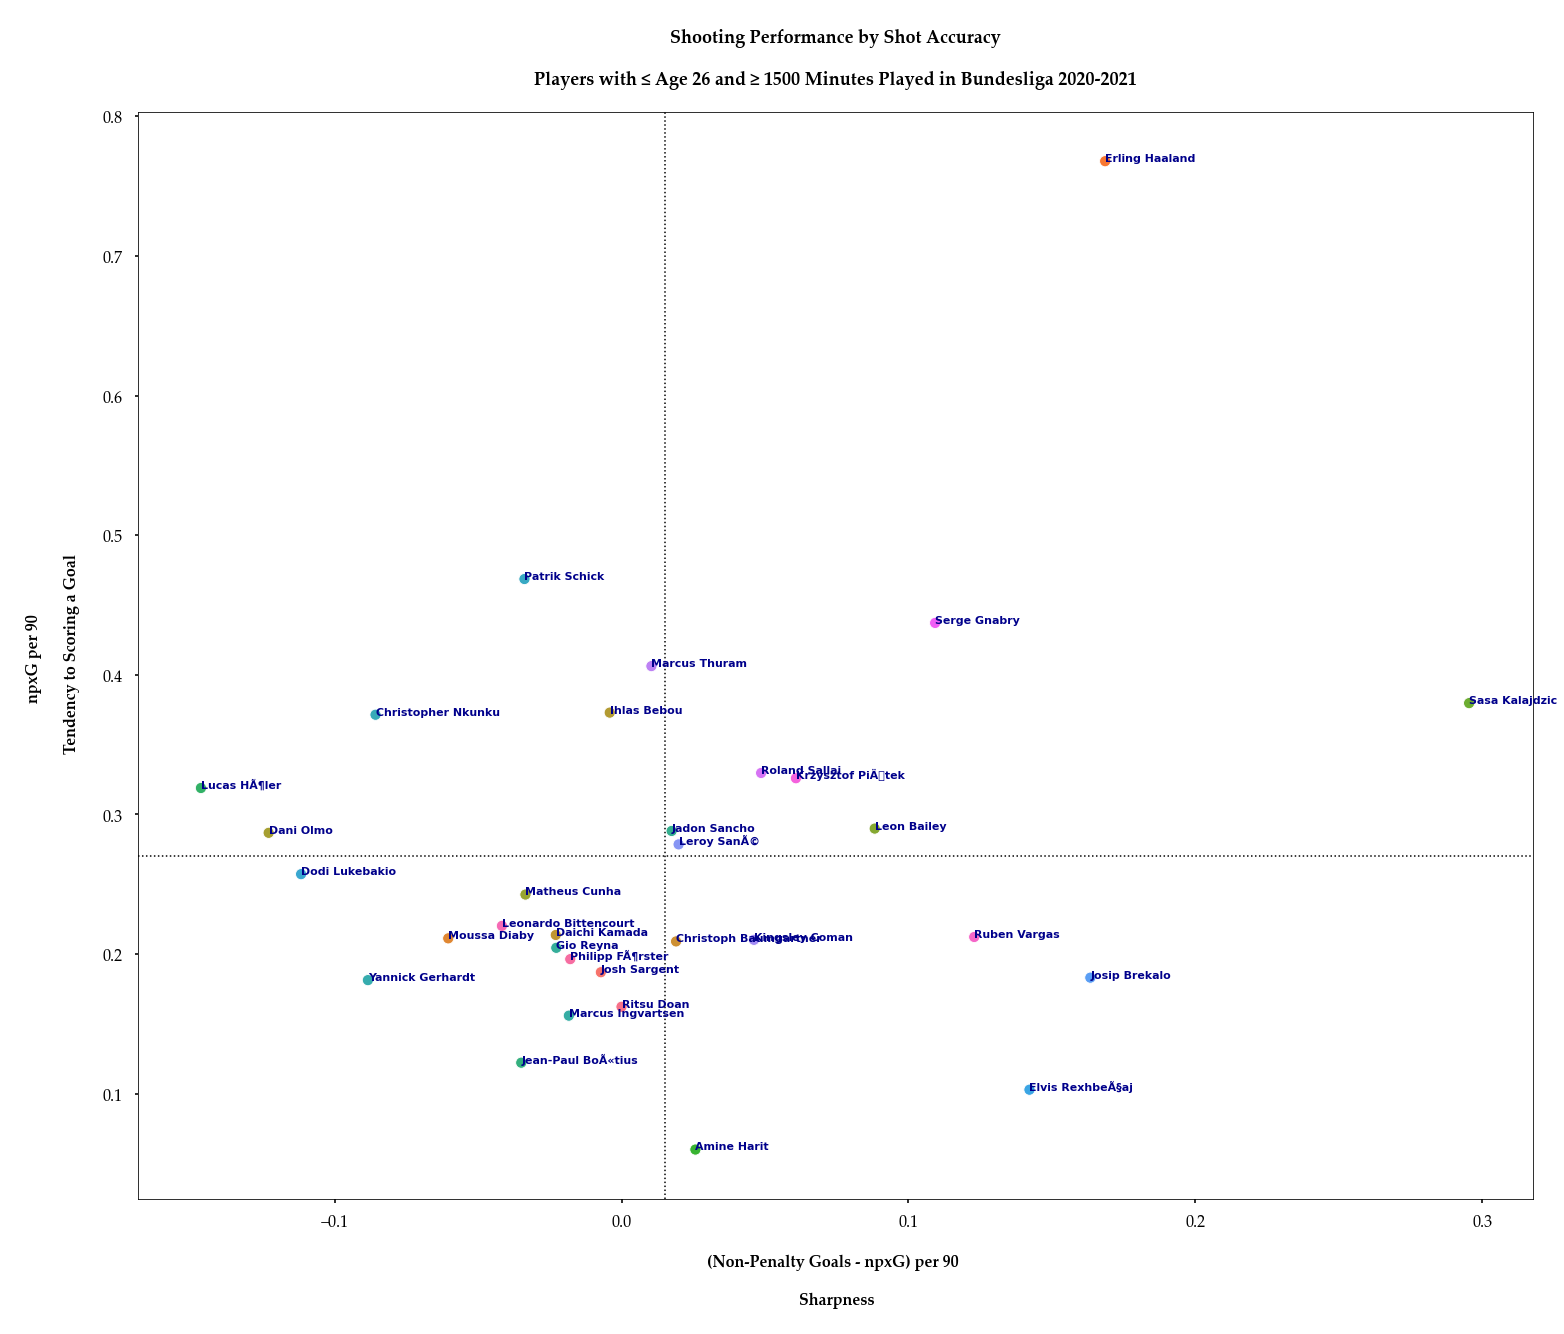

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#shooting scatter plot : seaborn is my thing
import seaborn as sns 
from adjustText import adjust_text
line_color = "silver"
marker_color = "dodgerblue"
with plt.style.context("seaborn-poster"):
    plt.rcParams['font.family'] = 'Palatino Linotype'
    ax_scatter = plt.subplots(figsize= (25,20))
    #sns.set_theme()
    # SETTING UP THE X AND Y OF THE SCATTERPLOT
    # axis-X : non-penalty goals minus npxG per 90 mins;(+) = ยิงคม
    # axis-Y : npxG per 90 mins ;(+) = ได้โอกาสยิงจ่อๆเยอะ
    x,y = (bundes['np:G-xG'].astype('float64')/bundes['90s'].astype('float64')).to_list(),((bundes['npxG'].astype('float64')/bundes['90s'].astype('float64')).astype('float64')).to_list()

    #plt.scatter(x,y,alpha=1,c='#EF8804')
    #scatter_label = [plt.text(x[i],y[i], f'Point{i}')for i in range(len(x))]
    labels = bundes.Player

    sns.scatterplot(x=x,y=y,hue=labels,legend=False)
    sns.set(rc={'figure.figsize':(50,10)})
    scatter_label = [plt.text(x_pos,y_pos,f'{l}',fontsize=11,fontweight='bold',color='darkblue') for (x_pos,y_pos,l)in zip(x,y,labels)];
    plt.xlabel("\n(Non-Penalty Goals - npxG) per 90 \n\n Sharpness\n",fontsize = 16, fontweight='bold')
    plt.ylabel("\nnpxG per 90 \n\n Tendency to Scoring a Goal\n",fontsize = 16, fontweight='bold')
    plt.title("\nShooting Performance by Shot Accuracy\n\nPlayers with ≤ Age 26 and ≥ 1500 Minutes Played in Bundesliga 2020-2021\n",fontsize = 18, fontweight='bold')
    plt.axvline((bundes['np:G-xG'].astype('float64')/bundes['90s'].astype('float64')).mean(),color = "black",linestyle ='dotted')
    plt.axhline((bundes['npxG'].astype('float64')/bundes['90s'].astype('float64')).mean(),color = "black",linestyle ='dotted')
    
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


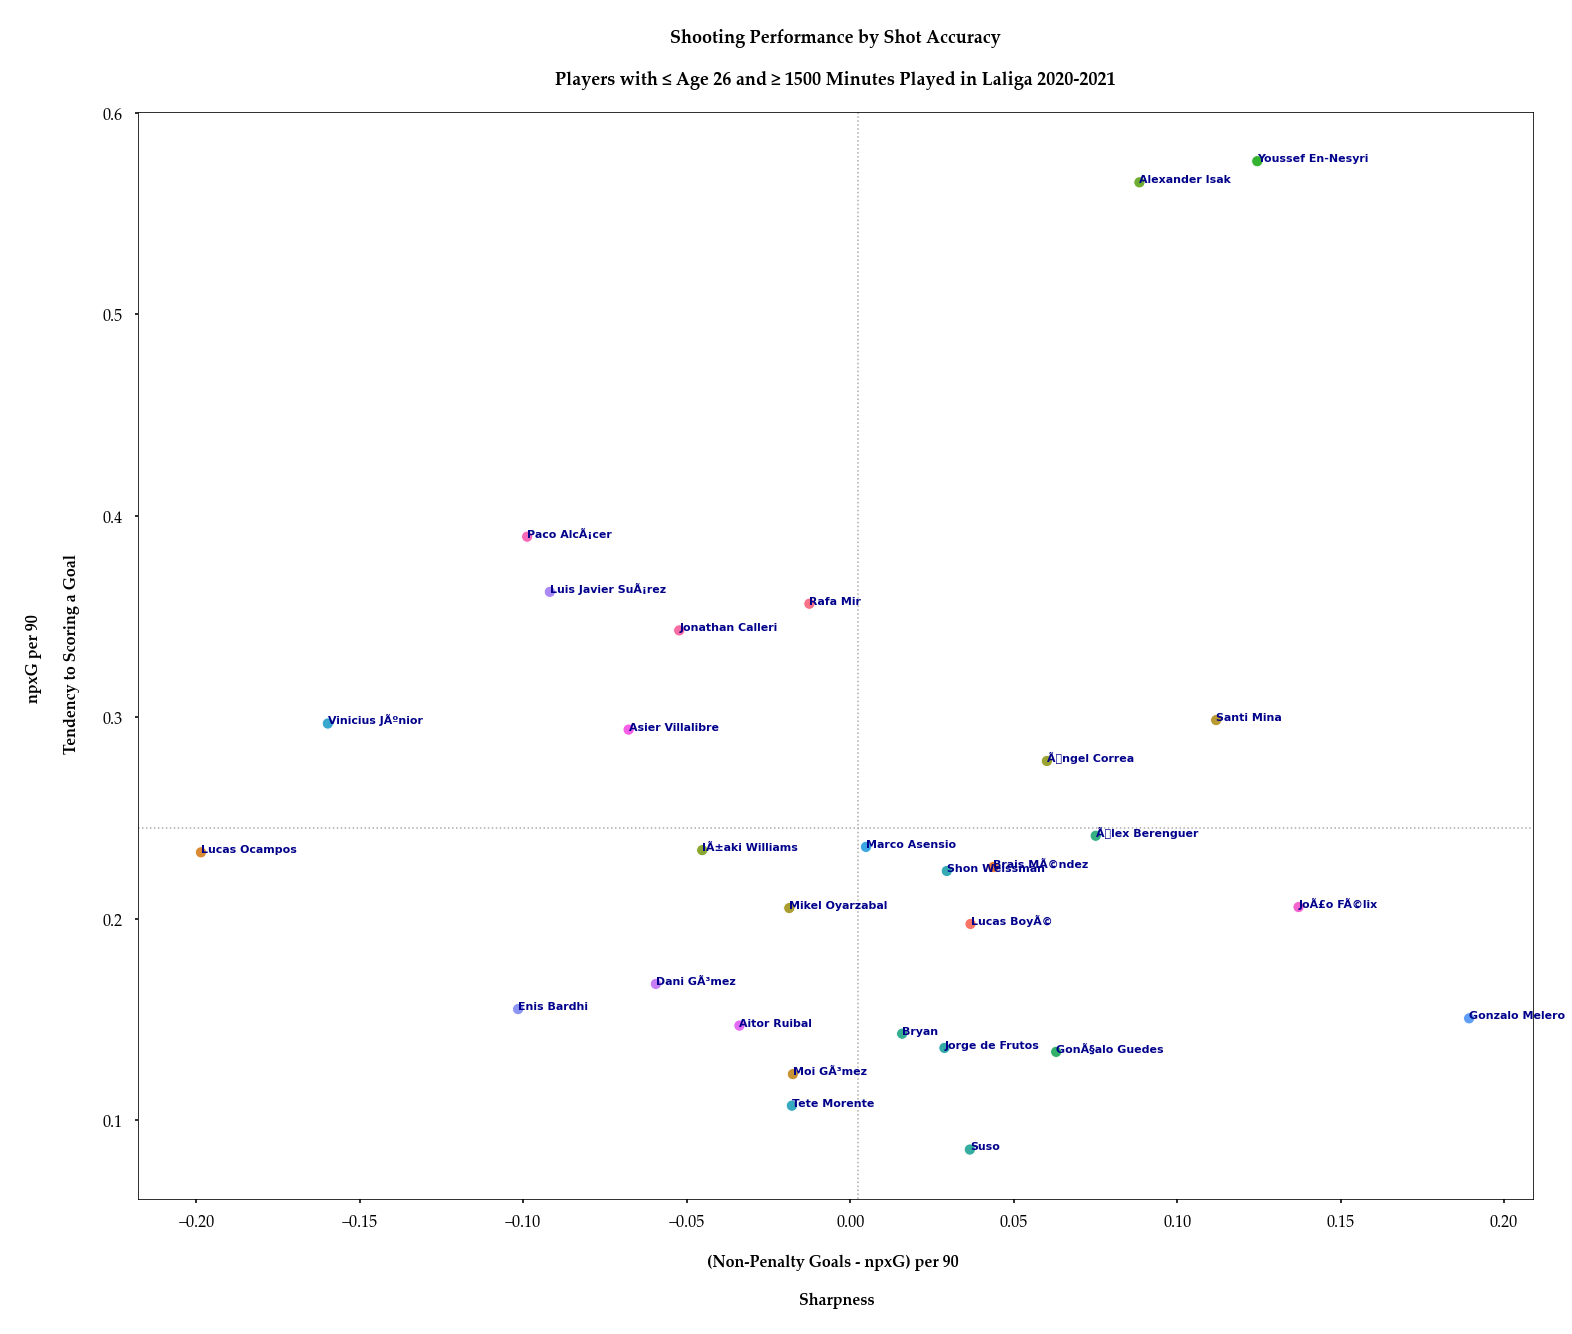

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#shooting scatter plot : seaborn is my thing
import seaborn as sns 
line_color = "silver"
marker_color = "dodgerblue"
from adjustText import adjust_text
with plt.style.context("seaborn-poster"):
    plt.rcParams['font.family'] = 'Palatino Linotype'
    ax_scatter = plt.subplots(figsize= (25,20))
    #sns.set_theme()
    # SETTING UP THE X AND Y OF THE SCATTERPLOT
    # axis-X : non-penalty goals minus npxG per 90 mins;(+) = ยิงคม
    # axis-Y : npxG per 90 mins ;(+) = ได้โอกาสยิงจ่อๆเยอะ
    x,y = (laliga['np:G-xG'].astype('float64')/laliga['90s'].astype('float64')).to_list(),((laliga['npxG'].astype('float64')/laliga['90s'].astype('float64')).astype('float64')).to_list()

    #plt.scatter(x,y,alpha=1,c='#EF8804')
    #scatter_label = [plt.text(x[i],y[i], f'Point{i}')for i in range(len(x))]
    labels = laliga.Player

    sns.scatterplot(x=x,y=y,hue=labels,legend=False)
    sns.set(rc={'figure.figsize':(10,10)})
    scatter_label = [plt.text(x_pos,y_pos,f'{l}',color='darkblue',fontsize=11, fontweight='bold') for (x_pos,y_pos,l)in zip(x,y,labels)];

    plt.xlabel("\n(Non-Penalty Goals - npxG) per 90 \n\n Sharpness\n",fontsize = 16, fontweight='bold')
    plt.ylabel("\nnpxG per 90 \n\n Tendency to Scoring a Goal\n",fontsize = 16, fontweight='bold')
    plt.title("\nShooting Performance by Shot Accuracy\n\nPlayers with ≤ Age 26 and ≥ 1500 Minutes Played in Laliga 2020-2021\n",fontsize = 18, fontweight='bold')
    plt.axvline((laliga['np:G-xG'].astype('float64')/laliga['90s'].astype('float64')).mean(),color = "darkgrey",linestyle ='dotted')
    plt.axhline((laliga['npxG'].astype('float64')/laliga['90s'].astype('float64')).mean(),color = "darkgrey",linestyle ='dotted')
    
plt.show()


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


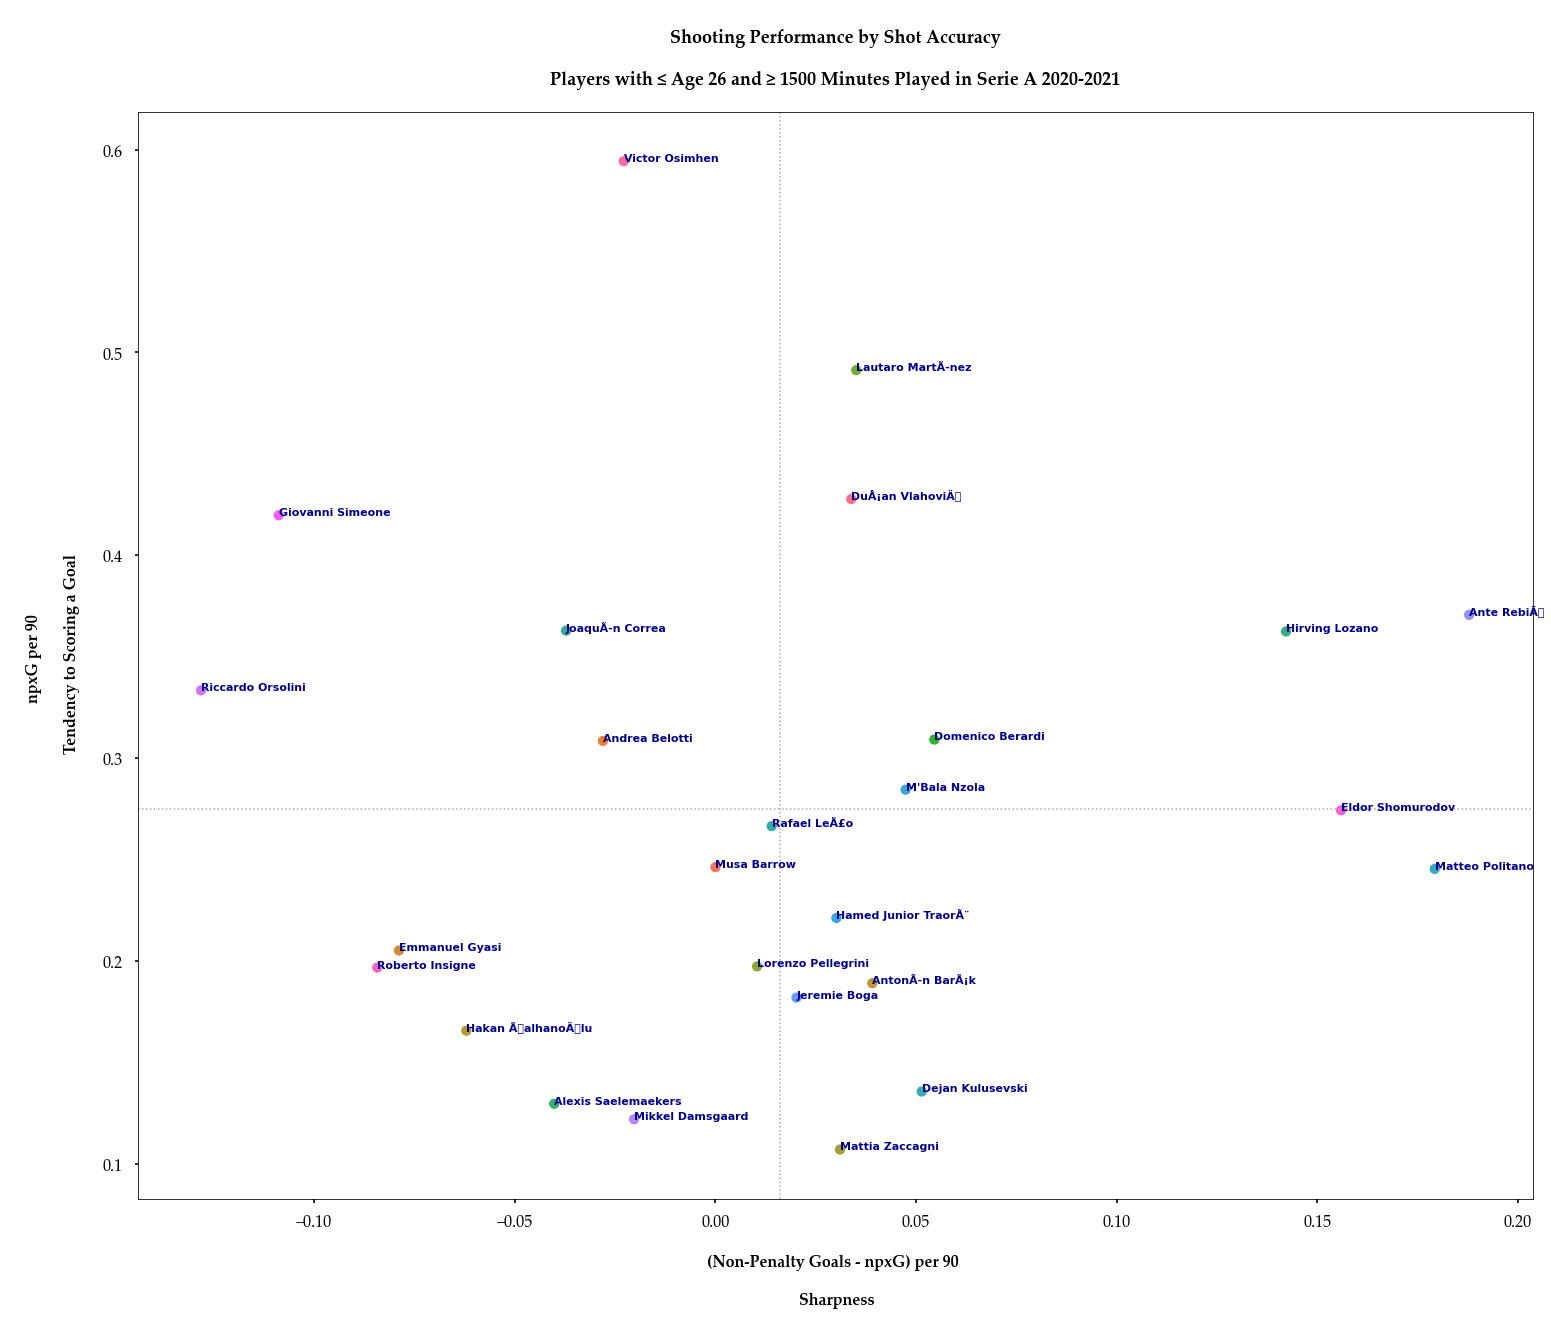

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#shooting scatter plot : seaborn is my thing
import seaborn as sns 
line_color = "silver"
marker_color = "midnightblue"
from adjustText import adjust_text
with plt.style.context("seaborn-poster"):
    plt.rcParams['font.family'] = 'Palatino Linotype'
    ax_scatter = plt.subplots(figsize= (25,20))
    #sns.set_theme()
    # SETTING UP THE X AND Y OF THE SCATTERPLOT
    # axis-X : non-penalty goals minus npxG per 90 mins;(+) = ยิงคม
    # axis-Y : npxG per 90 mins ;(+) = ได้โอกาสยิงจ่อๆเยอะ
    x,y = (calcio['np:G-xG'].astype('float64')/calcio['90s'].astype('float64')).to_list(),((calcio['npxG'].astype('float64')/calcio['90s'].astype('float64')).astype('float64')).to_list()

    #plt.scatter(x,y,alpha=1,c='#EF8804')
    #scatter_label = [plt.text(x[i],y[i], f'Point{i}')for i in range(len(x))]
    labels = calcio.Player

    sns.scatterplot(x=x,y=y,hue=labels,legend=False)
    sns.set(rc={'figure.figsize':(10,10)})
    scatter_label = [plt.text(x_pos,y_pos,f'{l}',fontsize=11, fontweight='bold',color='darkblue') for (x_pos,y_pos,l)in zip(x,y,labels)];
    plt.xlabel("\n(Non-Penalty Goals - npxG) per 90 \n\n Sharpness\n",fontsize = 16, fontweight='bold')
    plt.ylabel("\nnpxG per 90 \n\n Tendency to Scoring a Goal\n",fontsize = 16, fontweight='bold')
    plt.title("\nShooting Performance by Shot Accuracy\n\nPlayers with ≤ Age 26 and ≥ 1500 Minutes Played in Serie A 2020-2021\n",fontsize = 18, fontweight='bold')
    plt.axvline((calcio['np:G-xG'].astype('float64')/calcio['90s'].astype('float64')).mean(),color = "darkgrey",linestyle ='dotted')
    plt.axhline((calcio['npxG'].astype('float64')/calcio['90s'].astype('float64')).mean(),color = "darkgrey",linestyle ='dotted')
    
plt.show()


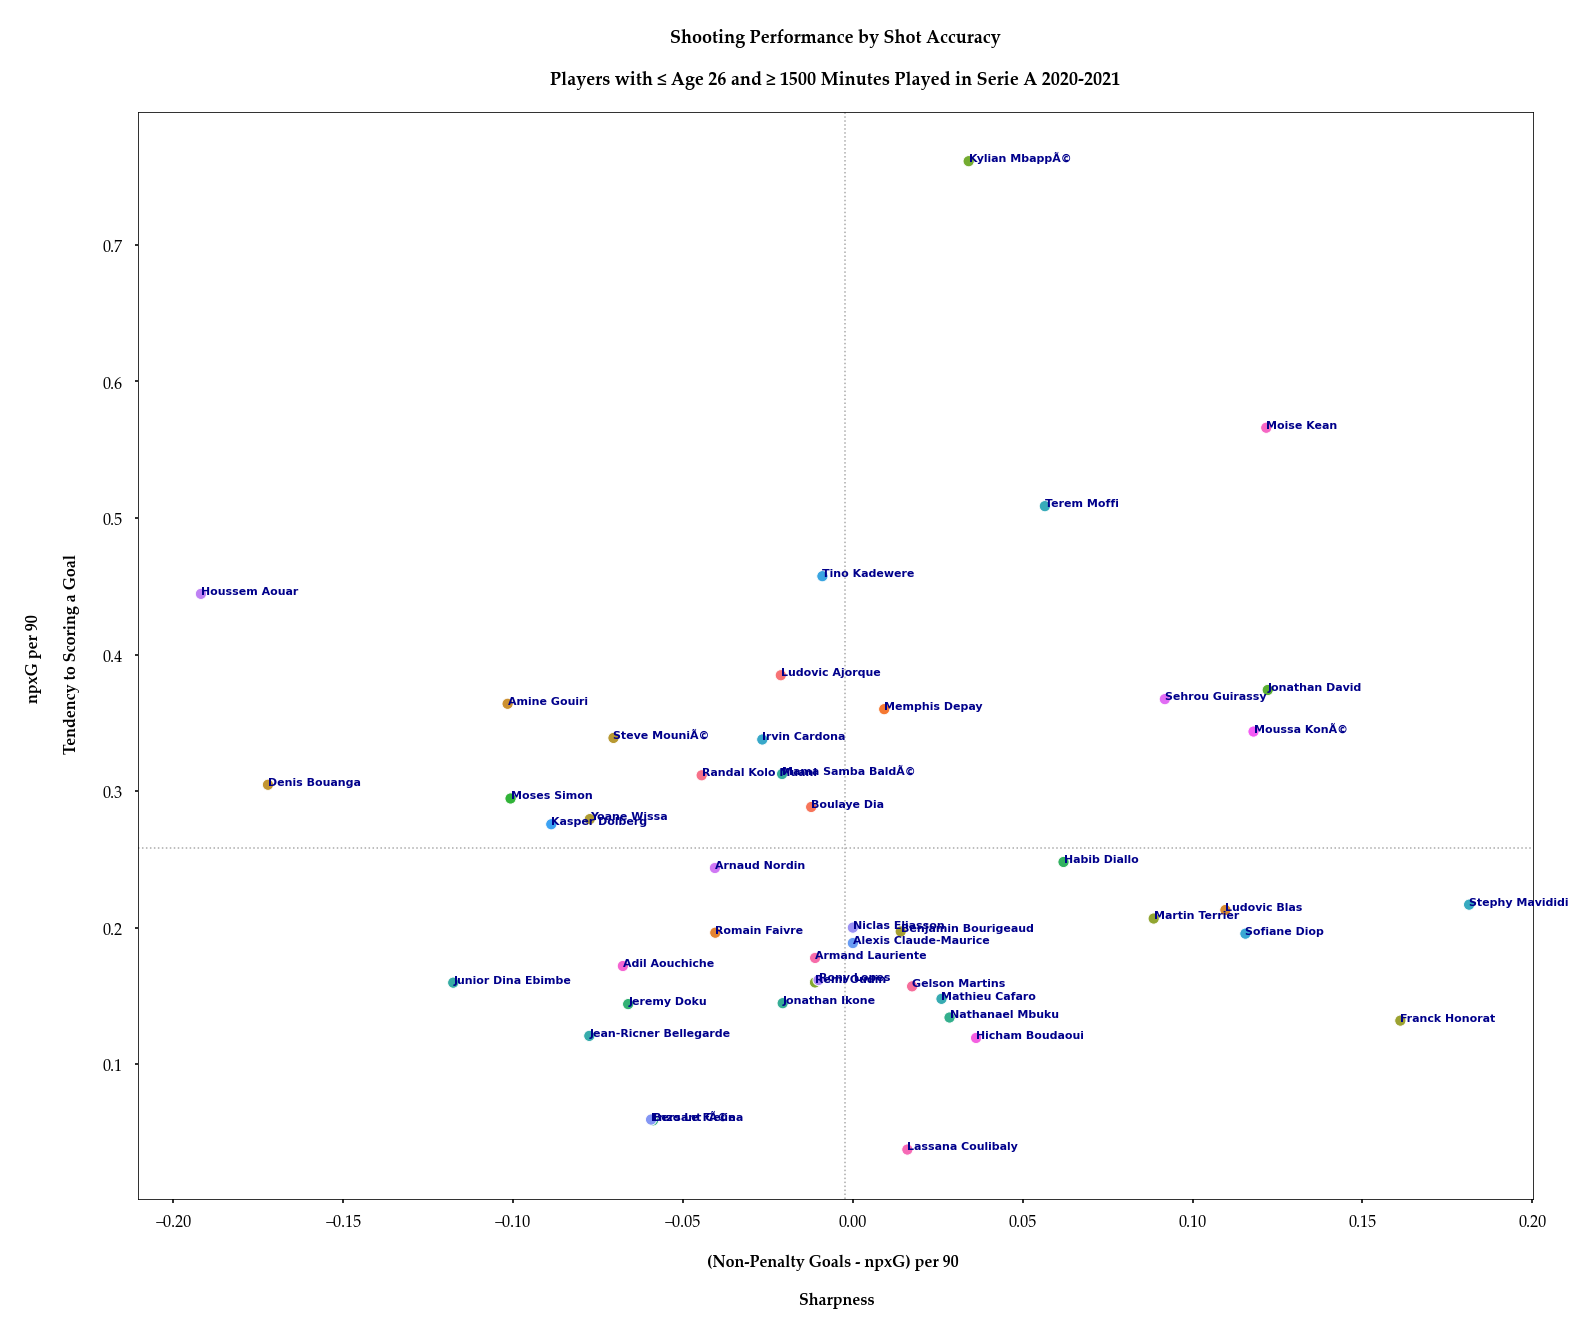

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#shooting scatter plot : seaborn is my thing
import seaborn as sns 
line_color = "silver"
marker_color = "midnightblue"
from adjustText import adjust_text
with plt.style.context("seaborn-poster"):
    plt.rcParams['font.family'] = 'Palatino Linotype'
    ax_scatter = plt.subplots(figsize= (25,20))
    #sns.set_theme()
    # SETTING UP THE X AND Y OF THE SCATTERPLOT
    # axis-X : non-penalty goals minus npxG per 90 mins;(+) = ยิงคม
    # axis-Y : npxG per 90 mins ;(+) = ได้โอกาสยิงจ่อๆเยอะ
    x,y = (fr['np:G-xG'].astype('float64')/fr['90s'].astype('float64')).to_list(),((fr['npxG'].astype('float64')/fr['90s'].astype('float64')).astype('float64')).to_list()

    #plt.scatter(x,y,alpha=1,c='#EF8804')
    #scatter_label = [plt.text(x[i],y[i], f'Point{i}')for i in range(len(x))]
    labels = FR.Player

    sns.scatterplot(x=x,y=y,hue=labels,legend=False)
    sns.set(rc={'figure.figsize':(10,10)})
    scatter_label = [plt.text(x_pos,y_pos,f'{l}',fontsize=11, fontweight='bold',color='darkblue') for (x_pos,y_pos,l)in zip(x,y,labels)];
    plt.xlabel("\n(Non-Penalty Goals - npxG) per 90 \n\n Sharpness\n",fontsize = 16, fontweight='bold')
    plt.ylabel("\nnpxG per 90 \n\n Tendency to Scoring a Goal\n",fontsize = 16, fontweight='bold')
    plt.title("\nShooting Performance by Shot Accuracy\n\nPlayers with ≤ Age 26 and ≥ 1500 Minutes Played in Serie A 2020-2021\n",fontsize = 18, fontweight='bold')
    plt.axvline((fr['np:G-xG'].astype('float64')/fr['90s'].astype('float64')).mean(),color = "darkgrey",linestyle ='dotted')
    plt.axhline((fr['npxG'].astype('float64')/fr['90s'].astype('float64')).mean(),color = "darkgrey",linestyle ='dotted')
    
plt.show()
